In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime
# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [2]:
df= pd.read_csv("EA.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.shape

(8233, 7)

In [3]:
import matplotlib.pyplot as plt
import pandas_datareader as web
from matplotlib import pyplot as plt
plt.style.use('seaborn')

from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from keras.models import Sequential # Create Model
from keras.layers import Dense # Neurons
from keras.layers import LSTM # Long Short Term Memory
from sklearn.preprocessing import MinMaxScaler # Normalize
from sklearn.metrics import mean_squared_error # Loss Function
from sklearn.model_selection import train_test_split

/var/folders/qh/215l544s06x3_jp987f9gdgh0000gn/T/ipykernel_12608/2363375889.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [4]:
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1989-09-20,0.0,0.531250,0.515625,0.515625,0.511700,15396800
1989-09-21,0.0,0.507813,0.500000,0.500000,0.496193,6224000
1989-09-22,0.0,0.507813,0.500000,0.500000,0.496193,2041600
1989-09-25,0.0,0.476563,0.468750,0.468750,0.465181,3072000
1989-09-26,0.0,0.476563,0.468750,0.468750,0.465181,888000


In [5]:
scale = MinMaxScaler()
scalled = scale.fit_transform(df)
i = 0
for col in df.columns:
    df[col] = scalled[:,i]
    i += 1

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8233.000000,8233.000000,8233.000000,8233.000000,8233.000000,8233.000000
mean,0.272784,0.270615,0.269323,0.271074,0.270890,0.093445
std,0.265756,0.265460,0.265633,0.266467,0.266530,0.071466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.063104,0.061026,0.059763,0.060840,0.060759,0.051511
50%,0.166846,0.166649,0.162001,0.164813,0.164593,0.076396
75%,0.379377,0.377349,0.376286,0.378347,0.377842,0.114643
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
x, y = df.drop('Volume', axis=1), df['Close']

In [8]:
data = df.filter(['Close'])
dataset = data.values #convert the data frame to a numpy array
training_data_len = math.ceil(len(dataset)*.8)  # number of rows to train the model on
training_data_len

6587

In [9]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train, y_train datasets
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.00078876, 0.00068359, 0.00068359, 0.00047325, 0.00047325,
       0.00047325, 0.00036809, 0.00036809, 0.00047325, 0.00068359,
       0.00073618, 0.00073618, 0.00073618, 0.00073618, 0.00063101,
       0.00052584, 0.00068359, 0.00052584, 0.00042067, 0.0003155 ,
       0.00026292, 0.00052584, 0.00042067, 0.00042067, 0.00036809,
       0.00036809, 0.00047325, 0.00063101, 0.00063101, 0.00047325,
       0.00057842, 0.00047325, 0.00047325, 0.00047325, 0.00057842,
       0.00057842, 0.00057842, 0.00073618, 0.00099909, 0.00094651,
       0.00099909, 0.00099909, 0.00089393, 0.00089393, 0.00089393,
       0.00094651, 0.00089393, 0.00099909, 0.00078876, 0.00068359,
       0.00084135, 0.00089393, 0.00073618, 0.00089393, 0.00105168,
       0.00084135, 0.00084135, 0.00084135, 0.00099909, 0.00089393])]
[0.0008413453925903702]



In [10]:
#convert the x_train and y_train  to numppy array
x_train,y_train = np.array(x_train), np.array(y_train)
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(6527, 60, 1)

**Long Short Term Memory**

In [11]:
#Buil the LSTM model
model =Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))
#Complie the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
#Train the model
model.fit(x_train,y_train, batch_size=1, epochs=10)

Epoch 1/10
6527/6527 [==============================] - 42s 6ms/step - loss: 2.2490e-04
Epoch 2/10
6527/6527 [==============================] - 40s 6ms/step - loss: 1.0035e-04
Epoch 3/10
6527/6527 [==============================] - 41s 6ms/step - loss: 7.6337e-05
Epoch 4/10
6527/6527 [==============================] - 40s 6ms/step - loss: 6.2148e-05
Epoch 5/10
6527/6527 [==============================] - 40s 6ms/step - loss: 6.1620e-05
Epoch 6/10
6527/6527 [==============================] - 40s 6ms/step - loss: 5.4835e-05
Epoch 7/10
6527/6527 [==============================] - 40s 6ms/step - loss: 5.2135e-05
Epoch 8/10
6527/6527 [==============================] - 40s 6ms/step - loss: 5.0467e-05
Epoch 9/10
6527/6527 [==============================] - 40s 6ms/step - loss: 4.8734e-05
Epoch 10/10
6527/6527 [==============================] - 40s 6ms/step - loss: 4.8956e-05


In [13]:
test_data= scaled_data[training_data_len-60:, :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [14]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(1646, 60, 1)

In [15]:
#predicting the data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

52/52 [==============================] - 1s 5ms/step


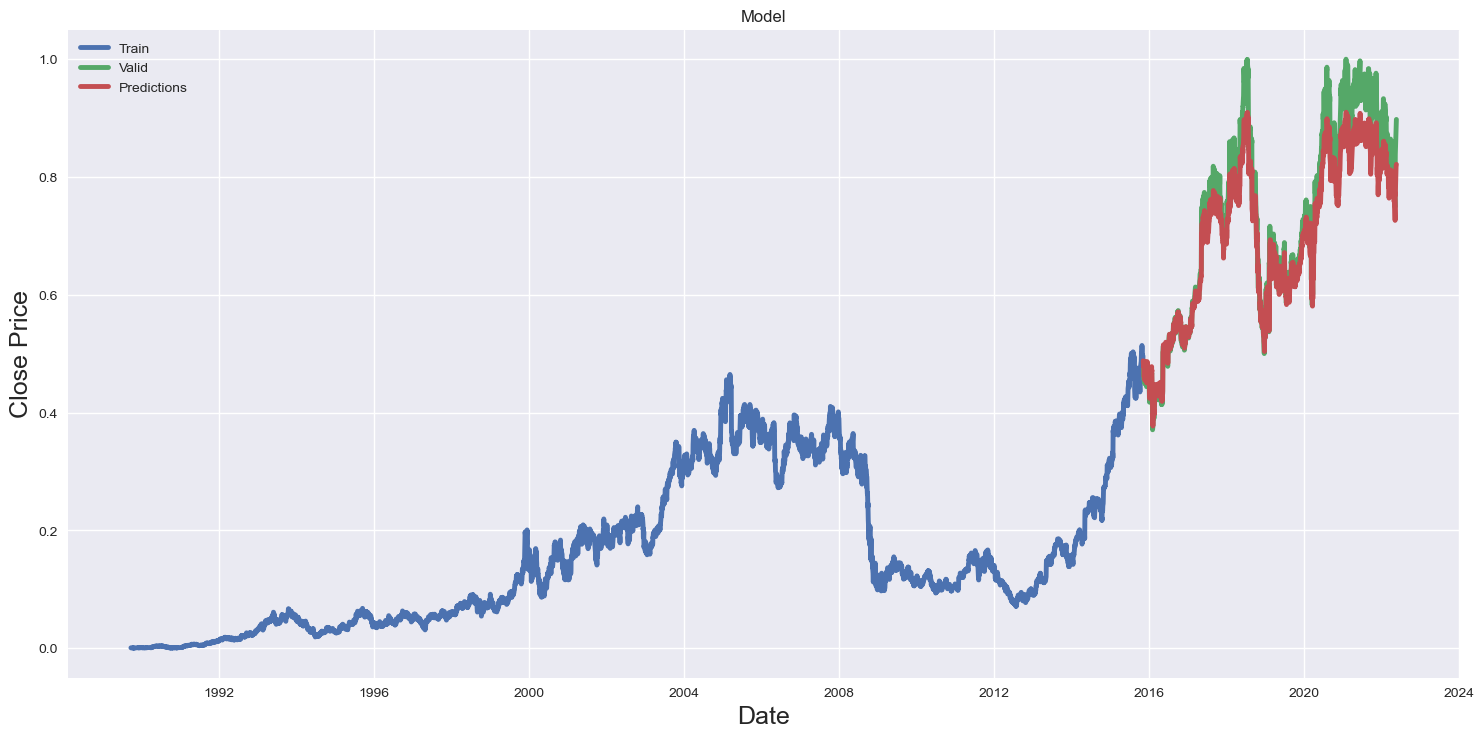

In [16]:
pd.options.mode.chained_assignment = None  # default='warn'
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visialization the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.plot(train['Close'],linewidth=3.5)
plt.plot(valid[['Close','Predictions']],linewidth=3.5)
plt.legend(['Train','Valid','Predictions'])

In [17]:
valid

,Close,Predictions
Date,,
2015-11-09,0.474799,0.488014
2015-11-10,0.474058,0.479559
2015-11-11,0.477222,0.478990
2015-11-12,0.479645,0.481520
2015-11-13,0.467731,0.483327
...,...,...
2022-05-17,0.862019,0.802319
2022-05-18,0.865385,0.807636
2022-05-19,0.872452,0.811048


In [19]:
#get the quote
coca_quote = pd.read_csv('EA.csv')
#Create new data frame
new_df = coca_quote.filter(['Close'])
#get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#scaled the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#append the past 60 days 
X_test.append(last_60_days_scaled)
#convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
#get the predicted scaled price
pred_price= model.predict(X_test)
#undo the scalling
pred_price = scaler.inverse_transform(pred_price)
pred_price

1/1 [==============================] - 0s 12ms/step


array([[1.9968089]], dtype=float32)

In [20]:
#importing packages for the prediction of time-series data
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.metrics import mean_squared_error

%matplotlib inline

In [21]:
import pandas as pd
import numpy as np
import math
import datetime as dt

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [22]:
df = pd.read_csv('EA.csv', parse_dates=['Date'])
df1 = df[['Date','Close']]
df1.head(3)

,Date,Close
0,1989-09-20,0.515625
1,1989-09-21,0.500000
2,1989-09-22,0.500000


In [23]:
# Setting the Date as Index
df_ts = df1.set_index('Date')
df_ts.sort_index(inplace=True)
print (type(df_ts))
print (df_ts.head(3))
print ("========================")
print (df_ts.tail(3))

<class 'pandas.core.frame.DataFrame'>
               Close
Date                
1989-09-20  0.515625
1989-09-21  0.500000
1989-09-22  0.500000
                 Close
Date                  
2022-05-19  130.020004
2022-05-20  130.759995
2022-05-23  133.770004


In [ ]:
# Basic plot 
df_ts.plot()

In [ ]:
# Dickey Fuller Test Function
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey-Fuller Test:')
    print ("==============================================")
    
    dftest = adfuller(timeseries, autolag='AIC')
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)
    

In [ ]:
# Convert the DF to series first
ts = df_ts['Close']

In [ ]:
# Rolling Statistics
rolmean = ts.rolling(window=12).mean()
rolvar = ts.rolling(window=12).std()

plt.plot(ts, label='Original')
plt.plot(rolmean, label='Rolling Mean')
plt.plot(rolvar, label='Rolling Standard Variance')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
test_stationarity(ts)

In [ ]:
# Lets Resample the data by Month and analyze again
df_ts_m = df_ts.resample('M').mean()
print (type(df_ts_m))
print (df_ts_m.head(3))

In [ ]:
tsm = df_ts_m['Close']
print (type(tsm))

In [ ]:
# Lets do a quick vanila decomposition to see any trend seasonality etc in the ts
decomposition = sm.tsa.seasonal_decompose(tsm, model='multiplicative')

fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

In [ ]:
# lets try to make the "tsm" Stationary

tsmlog = np.log10(tsm)
tsmlog.dropna(inplace=True)

tsmlogdiff = tsmlog.diff(periods=1)
tsmlogdiff.dropna(inplace=True)
# Stationarity Check
test_stationarity(tsmlogdiff)

In [ ]:
# Let's plot ACF & PACF graphs to visualize AR & MA components

fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(tsmlogdiff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(tsmlogdiff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

In [ ]:
y_2019 = df.loc[(df['Date'] >= '2019-01-01')
                     & (df['Date'] < '2020-01-01')]
monthvise= y_2019.groupby(y_2019['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise


In [ ]:
y_2019.groupby(y_2019['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2019.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2019.groupby(y_2019['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2019, x=y_2019.Date, y=[y_2019['Open'], y_2019['Close'], 
                                          y_2019['High'], y_2019['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()